# Introduction to Gridsearching Hyperparameters
---

![](https://snag.gy/aYcCt2.jpg)

### Learning Objective
- Understand what the terms gridsearch and hyperparameter mean.
- Understand how to manually build a gridsearching procedure.
- Apply sklearn's `GridSearchCV` object with basketball data to optimize a KNN model.
- Practice using and evaluating attributes of the gridsearch object.
- Understand the pitfalls of searching large hyperparameter spaces.
- Practice the grid search procedure independently optimizing regularized logistic regression.

### Lesson Guide
- [What is "grid searching"? What are "hyperparameters"?](#intro)
- [Using `GridSearchCV`](#gscv)
- [A Caution on Grid Searching](#caution)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<a id='intro'></a>

## What is "grid searching"? What are "hyperparameters"?

---

Models often have built-in specifications that we can use to fine-tune our results. For example, when we choose a linear regression, we may decide to add a penalty to the loss function such as the Ridge or the Lasso. Those penalties require the regularization strength, alpha, to be set. 

**These specifications are called hyperparameters.**

Hyperparameters are different from the parameters of the model that result from a fit, such as the coefficients. They are set prior to the fit - usually when we instantiate it - and they affect or determine the model's behavior.

There are often more than one kind of hyperparamter to set for a model. For example, in the KNN algorithm, we have a hyperparameter to set the number of neighbors. We also have a hyperparameter to set the weights, eithe uniform or distance. Generally, we want to know the *optimal* hyperparameter settings, the set that results in the best model evaluation. 

**The search for the optimal set of hyperparameters is called gridsearching.**

Gridsearching gets its name from the fact that we are searching over a "grid" of parameters. For example, imagine the `n_neighbors` hyperparameters on the x-axis and `weights` on the y-axis, and we need to test all points on the grid.

**Gridsearching uses cross-validation internally to evaluate the performance of each set of hyperparameters.** More on this later.

<a id='gscv'></a>
### Using `GridSearchCV`

This would be an annoying process to have to do manually. Luckily sklearn comes with a convenience class for performing gridsearch:

```python
from sklearn.model_selection import GridSearchCV
```

The `GridSearchCV` has a handful of important arguments:

| Argument | Description |
| --- | ---|
| **`estimator`** | The sklearn instance of the model to fit on |
| **`param_grid`** | A dictionary where keys are hyperparameters for the model and values are lists of values to test |
| **`cv`** | The number of internal cross-validation folds to run for each set of hyperparameters |
| **`n_jobs`** | How many cores to use on your computer to run the folds (-1 means use all cores) |
| **`verbose`** | How much output to display (0 is none, 1 is limited, 2 is printouts for every internal fit) |


Below is an example for how one might set up the gridsearch for our KNN:

```python
tuned_parameters = {'kernel': ['rbf','poly'],
                    'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}

                               
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, verbose=0)
clf.fit(X_train, y_train)
```

###We are going to  recognize digits (0-9) using hypergrid search concept.

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import utils

%matplotlib inline

## Load digit data

In [0]:
# starter code 
digits = load_digits()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [0]:
X_train.shape

(1437, 64)

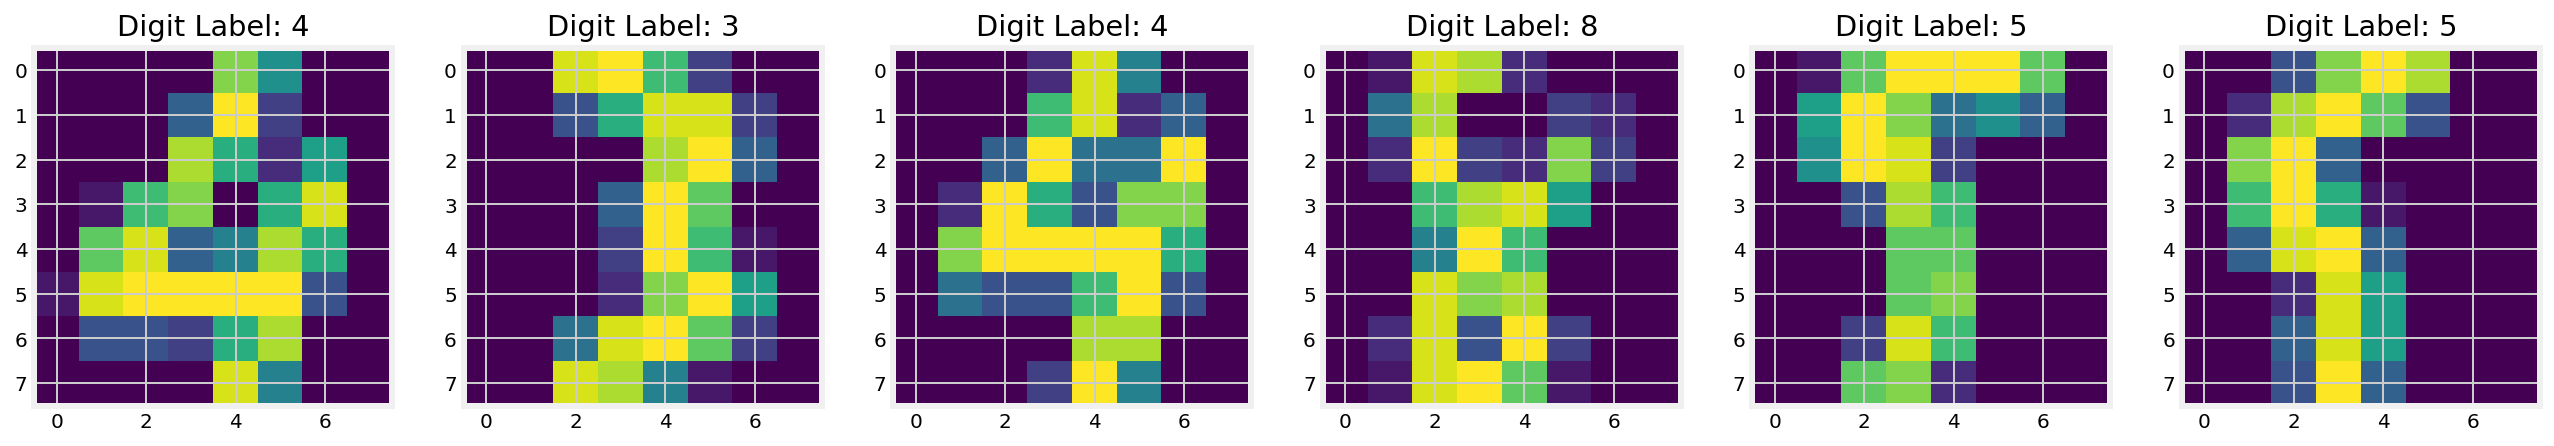

In [0]:
# # Pick 6 random digit data to display
viz_data = np.random.choice(range(X_train.shape[0]), 6)
fig = plt.figure(figsize=(20, 20))
for idx, img in enumerate(viz_data):
    fig.add_subplot(1, 6, idx+1)
    plt.imshow(X_train[img].reshape(8, 8))
    plt.title("Digit Label: {}".format(y_train[img]))

In [0]:
# normalizing the dataset 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Import GridSearchCV and set up some hyperparameters for it to search for a best model on [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

tuned_parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}
# add sigmoid choice to the kernel choice
# try C as 1000, 2000, and 5000

**Try out the sklearn gridsearch below on the training data.**

In [0]:
%%time
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, verbose=0)
clf.fit(X_train, y_train)

CPU times: user 22.9 s, sys: 6.46 ms, total: 22.9 s
Wall time: 22.9 s


<a id='gs-results'></a>
### Examining the Results of the Grid Search

Once the grid search has fit (this can take awhile!) we can pull out a variety of information and useful objects from the gridsearch object, stored as attributes:

| Property | Use |
| --- | ---|
| **`results.param_grid`** | Displays parameters searched over. |
| **`results.best_score_`** | Best mean cross-validated score achieved. |
| **`results.best_estimator_`** | Reference to model with best score.  Is usable / callable. |
| **`results.best_params_`** | The parameters that have been found to perform with the best score. |
| **`results.cv_results_`** | Display estimator parameters and scores. | 

In [0]:
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.939 (+/-0.039) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.107 (+/-0.002) for {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
0.502 (+/-0.026) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.107 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}
0.975 (+/-0.016) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.112 (+/-0.014) for {'C': 10, 'gamma': 0.001, 'kernel': 'poly'}
0.941 (+/-0.035) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.107 (+/-0.002) for {'C': 10, 'gamma': 0.0001, 'kernel': 'poly'}
0.976 (+/-0.026) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.160 (+/-0.009) for {'C': 100, 'gamma': 0.001, 'kernel': 'poly'}
0.972 (+/-0.017) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.107 (+/-0.002) for {'C': 100, 'gamma': 0.0001, 'kernel': 'poly'}
0.977 (+/-0.026) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.771 (+/-0.021) for {'C': 1

**Print out the best score found in the search.**

In [0]:
print ('prediction score on testing data with the best estimator: %.2f%%' % (clf.best_estimator_.score(X_test,y_test)*100))

prediction score on testing data with the best estimator: 98.33%


<a id='caution'></a>

## A Word of Caution on Grid Searching

---

Sklearn models often have many options/hyperparameters with many different possible values. It may be tempting to search over a wide variety of them. In general, this is not wise.

Remember that **gridsearch searches over all possible combinations of hyperparamters in the paramter dictionary!**

If your model class takes a wider range of options during grid searching for the best hyperparameter set, there can be a great number of possible combination of hyperparameters


If you're not careful, gridsearching can quickly blow up and takes a long time to finish.

> **It is extremely important to understand what the hyperparameters do and think critically about what ranges are useful and relevant to your model!**
